# Motion Capture Hand Postures

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

In [2]:
# Loading data to dataframe using pandas
df = pd.read_csv('Group_8_data_cleaned.csv')

In [3]:
# Splitting the data to input data and output data
X=df.drop(['Class', 'User'],axis=1)
y=df['Class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Scaling the data using standard scaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [6]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [7]:
search = GridSearchCV(pipeline,
                      {'model__alpha': np.arange(0.1,10,0.1)},
                      cv = 5,verbose=3
                      )

In [8]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..................model__alpha=0.1;, score=0.699 total time=   0.0s
[CV 2/5] END ..................model__alpha=0.1;, score=0.708 total time=   0.0s
[CV 3/5] END ..................model__alpha=0.1;, score=0.728 total time=   0.0s
[CV 4/5] END ..................model__alpha=0.1;, score=0.728 total time=   0.0s
[CV 5/5] END ..................model__alpha=0.1;, score=0.715 total time=   0.0s
[CV 1/5] END ..................model__alpha=0.2;, score=0.647 total time=   0.0s
[CV 2/5] END ..................model__alpha=0.2;, score=0.657 total time=   0.0s
[CV 3/5] END ..................model__alpha=0.2;, score=0.674 total time=   0.0s
[CV 4/5] END ..................model__alpha=0.2;, score=0.676 total time=   0.0s
[CV 5/5] END ..................model__alpha=0.2;, score=0.664 total time=   0.0s
[CV 1/5] END ..model__alpha=0.30000000000000004;, score=0.579 total time=   0.0s
[CV 2/5] END ..model__alpha=0.30000000000000004

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             verbose=3)

In [9]:
search.best_params_

{'model__alpha': 0.1}

In [10]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [11]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0150985 , 0.        , 0.        ,
       0.02095302, 0.        , 0.        , 0.01430774, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03059875,
       0.        , 0.        , 0.        , 0.17545608, 0.        ,
       0.        , 0.13583212, 0.03576913, 0.        , 0.11337162,
       0.        , 0.6391337 , 0.5598697 ])

In [12]:
features = df.columns
features_lasso = np.array(features[2:])[importance != 0]
features_lasso

array(['Y2', 'Y3', 'Y4', 'Y6', 'Z7', 'Z8', 'X9', 'Z9', 'Y10', 'Z10'],
      dtype=object)

In [13]:
np.array(features[2:])[importance == 0]

array(['X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Z2', 'X3', 'Z3', 'X4',
       'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Z6', 'X7', 'Y7', 'X8', 'Y8', 'Y9',
       'X10'], dtype=object)

# Best Model from part-2 Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
X_best = df[features_lasso]

In [16]:
X_best

,Y2,Y3,Y4,Y6,Z7,Z8,X9,Z9,Y10,Z10
0,81.680557,67.749220,10.678936,52.537321,1.356154,-1.077380,37.172842,-10.663720,76.311915,-27.775952
1,43.254091,68.400808,11.779919,52.537321,1.356154,-1.077380,37.172842,-10.663720,76.311915,-27.775952
2,43.567403,68.907925,11.793440,52.537321,1.356154,-1.077380,37.172842,-10.663720,76.311915,-27.775952
3,68.214645,11.250648,42.717833,52.537321,1.356154,-1.077380,37.172842,-10.663720,76.311915,-27.775952
4,42.426849,67.901260,10.841109,52.537321,1.356154,-1.077380,37.172842,-10.663720,76.311915,-27.775952
...,...,...,...,...,...,...,...,...,...,...
78090,122.758679,98.056881,136.368236,77.622306,-53.126136,-6.543115,87.733364,-48.713932,78.677105,-32.567608
78091,77.858214,104.726272,135.823494,98.288931,-5.985371,-62.130563,78.229847,-45.249543,78.677105,-32.567608
78092,104.222208,77.688911,135.605903,122.614027,-62.718735,3.835904,78.591554,-46.166556,78.677105,-32.567608
78093,77.705861,135.523929,104.026431,129.477879,3.394291,-63.221626,50.793322,-30.884241,78.677105,-32.567608


In [17]:
X_train_b, X_test_b, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

In [18]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

In [19]:
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [20]:
rfc.fit(X_train_b, y_train)

RandomForestClassifier(max_depth=8, n_estimators=201, random_state=42)

In [21]:
y_pred_rfc = rfc.predict(X_test_b)

In [22]:
print("Accuracy for Random Forest for test data",accuracy_score(y_test,y_pred_rfc))

Accuracy for Random Forest for test data 0.9812198557343463


In [23]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.92      0.98      0.95      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.98      0.92      0.95      4696

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



In [24]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
conf_matrix_rfc

array([[4881,   16,    0,    0,    1],
       [   0, 4417,    0,    0,   68],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   0,  355,    0,    0, 4341]], dtype=int64)

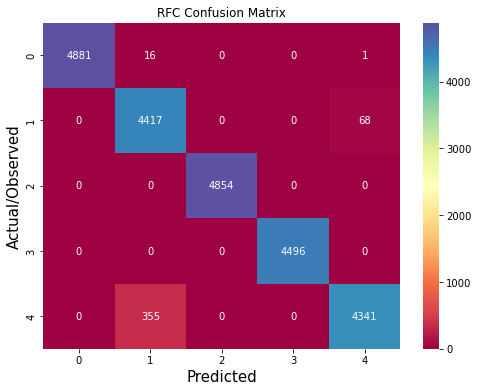

In [25]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

# Best Model from part-3 Multi Layer Perceptron Classifier

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
mlp = MLPClassifier(learning_rate= 'adaptive', hidden_layer_sizes= 1000, alpha= 0.001)
mlp.fit(X_train_b, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=1000, learning_rate='adaptive')

In [28]:
y_pred_mlp = mlp.predict(X_test_b)

In [29]:
print("Accuracy for Multi Layer Perceptron for test data",accuracy_score(y_test,y_pred_mlp))

Accuracy for Multi Layer Perceptron for test data 0.9835246916214947


In [30]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4898
           2       0.96      0.96      0.96      4485
           3       1.00      1.00      1.00      4854
           4       1.00      1.00      1.00      4496
           5       0.96      0.96      0.96      4696

    accuracy                           0.98     23429
   macro avg       0.98      0.98      0.98     23429
weighted avg       0.98      0.98      0.98     23429



In [31]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
conf_matrix_mlp

array([[4882,   15,    0,    0,    1],
       [   2, 4303,    0,    0,  180],
       [   0,    0, 4854,    0,    0],
       [   0,    0,    0, 4496,    0],
       [   1,  183,    2,    2, 4508]], dtype=int64)

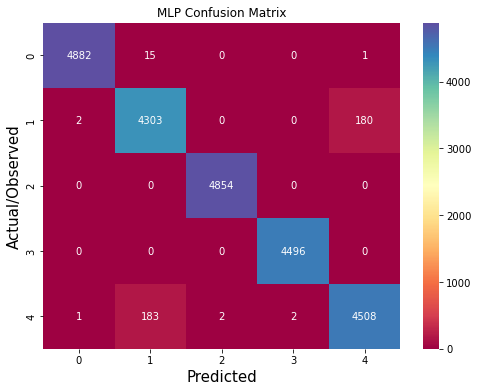

In [32]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_mlp, 
            annot=True, 
            cmap="Spectral", fmt = "g")
plt.title("MLP Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);